# Matplotlib
One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends. Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish. This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib. It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world. 

This guide is based on excellent notebooks from the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)

## Basics

We import Matplotlib as follows:

In [2]:
import matplotlib.pyplot as plt

The `plt` alias is used universally. We cab also configure the broad style used for the Matplotlib figures:

In [3]:
plt.style.use('classic')

Working in an Ipython notebook environment, we use the `%matplotlib` magic command:
* `%matplotlib notebook` gives *innteractive* plots embedded within the notebook.
* `matplotlib inline` gives *static* plots embedded within the notebook.

In practice, we often opt for the `inline` option:

In [4]:
%matplotlib inline

This command only needs to be run once per session, and will create an embedded PNG image of the figure within the notebook.

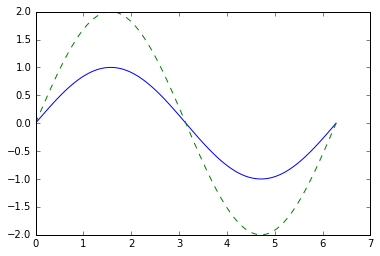

In [6]:
import numpy as np
import math

x = np.linspace(0, 2*math.pi, 100)
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, 2*np.sin(x), '--');

If we want to save the figure, we can simply use the `savefig` method of the figure.

In [19]:
fig.savefig('test_figure.png')

We can then read this image back in from file:

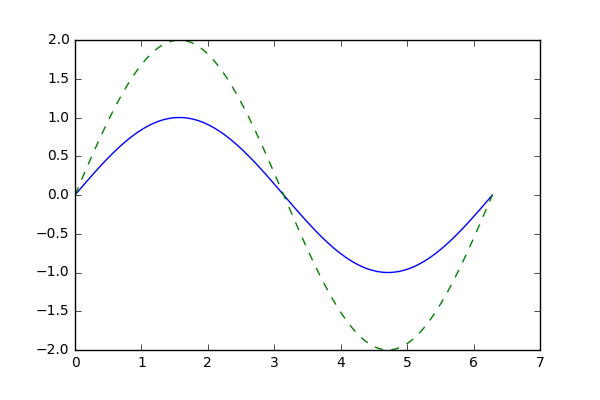

In [23]:
from IPython.display import Image
Image('test_figure.png')

## Interfaces
### MATLAB-style
Matplotlib was originally written as a Python alternative for MATLAB users, so the syntax is quite similar:

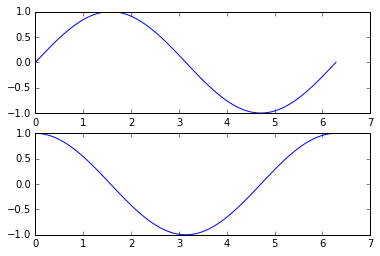

In [27]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to note that the Matplotlib interface is stateful: it keeps track of the "current" figure and axes, which are where all plt commands are applied. You can get a reference to these using the following two commands:
* `plt.gcf()`— get current figure
* `plt.gca()`— get current axes

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first? This is possible within the MATLAB-style interface, but a bit clunky. Fortunately, there is a better way.

### Object-oriented interface
The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure. Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are methods of explicit `Figure` and `Axes` objects. To re-create the previous plot using this style of plotting, you might do the following:

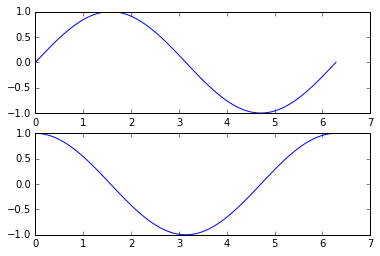

In [29]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

For simple plots, choosing between the MATLAB and object-oriented interfaces is largely a matter of preference, but the fine-grained control offered by the object-oriented approach can be very important when dealing with complicated plots.

## Simple Line Plots
### The Basics

By simple line plots we refer to visualisations of a single function $y=f(x)$. We'll use the `seaborn-whitegrid` style for the plots in this section.

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

The most fundamental objects for a Matplotlib plot are the `figure` and the `axes`:

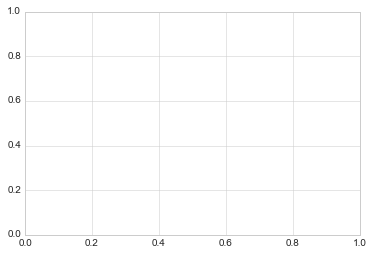

In [34]:
fig = plt.figure()
ax = plt.axes()

The *figure*, which is an instance of the class `matplotlib.pyplot.Figure` contains all the objects representing axes, graphics, text and labels. The *axes* is an instance of `matplotlib.pyplot.Axes`, and is the bounding box visible above with ticks and labels, which will house the plot elements that comprise the visualisation.

To plot figures we can call the plot function one or multiple times:

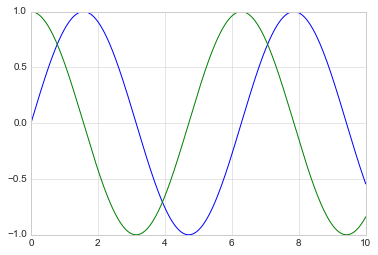

In [36]:
x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

The above was using the MATLAB interface to Matplotlib. We could equally be using the object-oriented interface This entails calling `plot` as a method of the `Axes` object, rather than calling the `plot` function on the current figure.

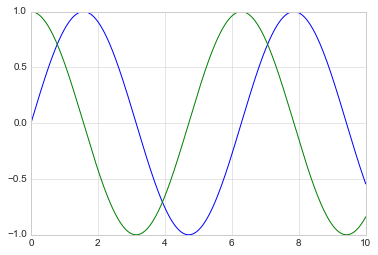

In [40]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x));

### Plot Style Elements
The `plt.plot()` function takes additional arguments to specify multiple style elements.

**Colour**

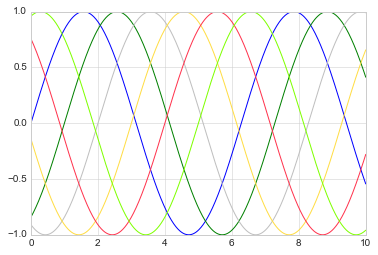

In [41]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

**Line Style**

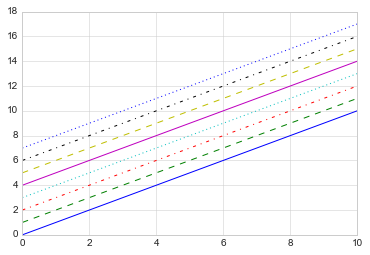

In [42]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

### Plot Adjustments
**Axes limits**

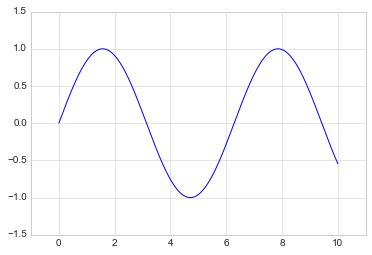

In [45]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

Interestingly, the plot can be flipped by reversing the arguments for the axes limits:

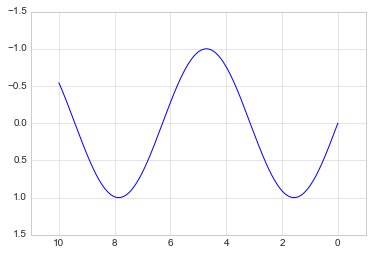

In [46]:
plt.plot(x, np.sin(x))

plt.xlim(11, -1)
plt.ylim(1.5, -1.5);

The `axis` argument to the `plot` function can be used to specify the axes limits, as well as other display characteristics:

**Tight bounds around plot**

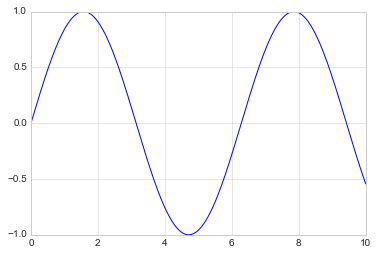

In [47]:
plt.plot(x, np.sin(x))
plt.axis('tight');

**Equal aspect ratio** (visually, x and y increment in equal units)

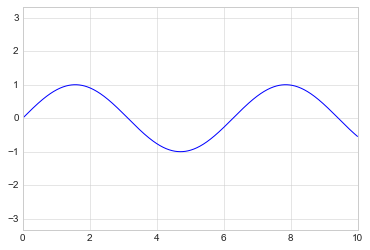

In [48]:
plt.plot(x, np.sin(x))
plt.axis('equal');

### Labelling Plots

Titles and exis labels are some of the most common requisites in a plot.

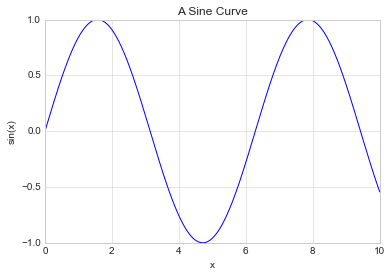

In [49]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

Plot legends are often useful when plotting multiple lines on a single plot. Passing a `label` for each line when plotted allows this to be done easily:

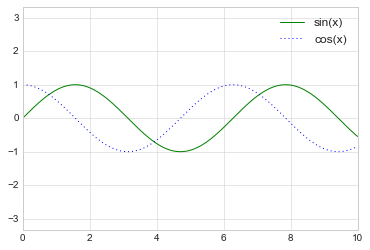

In [50]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

**Exercise: ** Create a simple line plot of the probability density function of a standard normal distribution on the interval $[-3, 3]$. Code the density function from first principles (you may also want to check out `np.vectorize`). Remember, the PDF of a normal distribution is given by the equation:
$$
f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}
$$
Indicate the mean of the distribution with a red line.

### Conversion between MATLAB and Object-oriented Style

`plt` functions like `plot` and `legend` convert directly into axes methods `plot` and `legend`. The following commands are slightly modified, however:
- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``
Using the object-oriented interface, the `set` axes method can be used to set multiple properties at once:

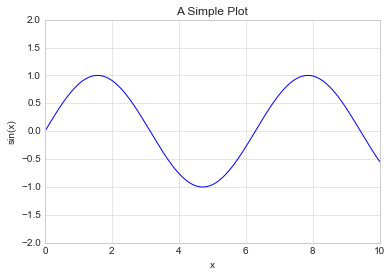

In [51]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

## Simple Scatter Plots

Scatter plots represent each point as a distinct mark, as opposed to connecting points that map out a relationship between an independent and dependent variable.

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

We can represent functional relationships as in the previous section using scatter plots:

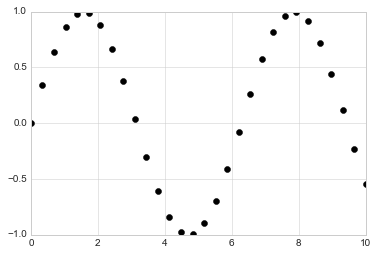

In [53]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character that represents the type of symbol used for the plotting. These symbols come with their own string arguments, best shown by way of visualisation:

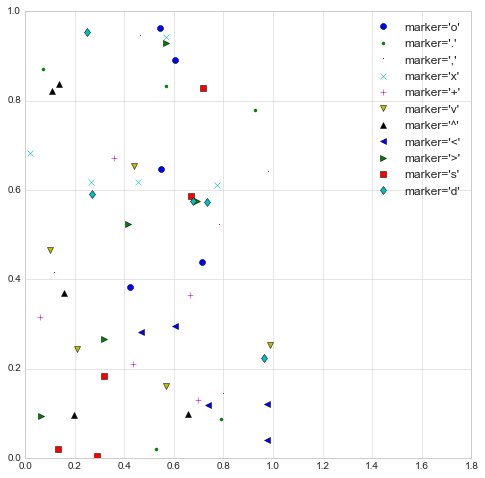

In [59]:
rng = np.random.RandomState(0)
plt.figure(figsize=(8, 8))
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label=f"marker='{marker}'")
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

Multiple additional arguments can be passed to `plt.plot` to specify further properties of lines and markers:

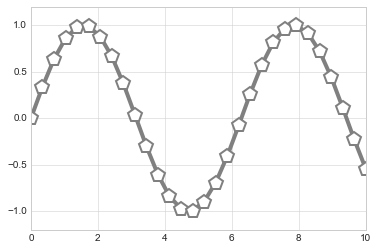

In [60]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

One of the core strengths of the scatter plot is the fine-grained control it allows over representations for each data point:


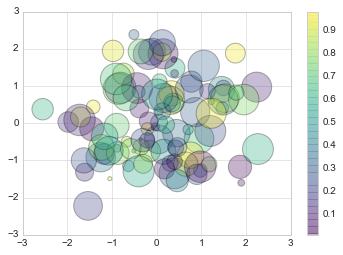

In [62]:
# random normal coordinates per point
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
# random uniform colours and sizes per point
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

**Exercise: ** Create a scatterplot of three multivariate normal distributions. Each has covariate matrix $\begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}$, and the means given by:
1. $\begin{bmatrix} 1 \\ 0\end{bmatrix}$

2. $\begin{bmatrix} 5 \\ 6\end{bmatrix}$

3. $\begin{bmatrix} 12 \\ 10\end{bmatrix}$

Use different markers and colours for each distribution, make each point size proportional to the point's distance from the origin, add opacity and include a label for the plot.

Lets take a look at the classic Iris dataset:



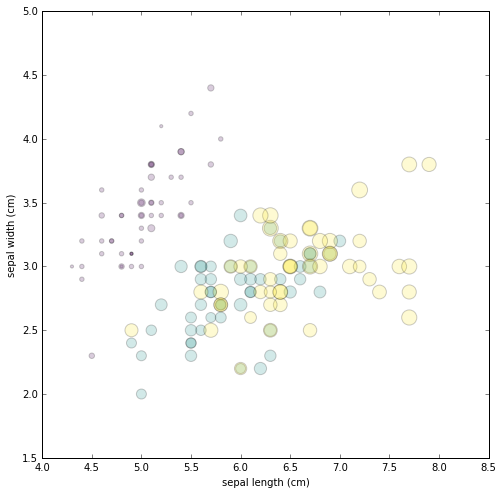

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.figure(figsize=(8, 8))
plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data: the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower. Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

**Note:** `plot` can be significantly more efficient than `scatter`, especially with multiple data points, as in the former, points are stylistic clones, but in the latter they can vary individually.

## Error Bars

For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself.

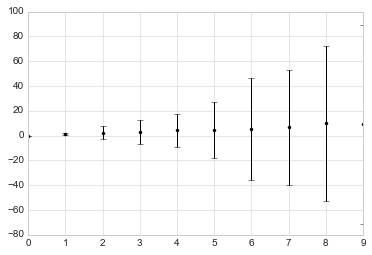

In [82]:
index = range(10)
sample_means = []
sample_vars = []

for i in index:
    sample = np.random.normal(loc=i, scale=i, size=100)
    sample_means.append(np.mean(sample))
    sample_vars.append(np.var(sample))
    
plt.errorbar(index, sample_means, yerr=sample_vars, fmt='.k');

We can control stylistic elements of the error bars as usual:

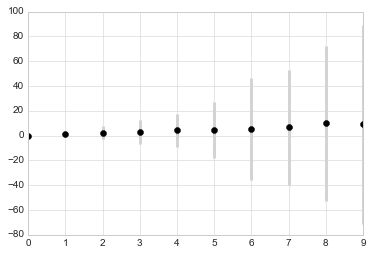

In [84]:
plt.errorbar(index, sample_means, yerr=sample_vars, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

## Density and Contour plots
Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions. There are three Matplotlib functions that can be helpful for this task: 
1. `plt.contour` for contour plots
2. `plt.contourf` for filled contour plots
3. `plt.imshow` for showing images

We'll start by demonstrating a contour plot using a function $z = f(x, y)$.

In [85]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [87]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

# create a two-dimensional grid from one-dimensional arrays
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

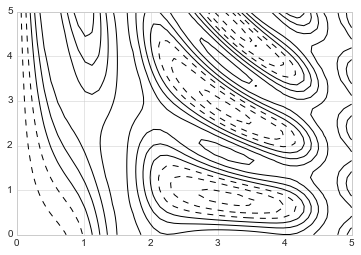

In [88]:
plt.contour(X, Y, Z, colors='black');

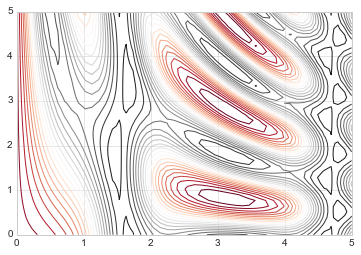

In [89]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

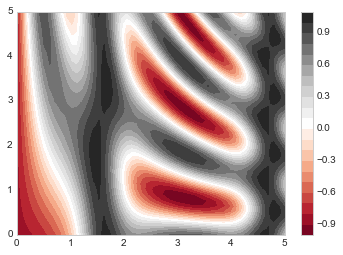

In [90]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

The color steps above are discrete rather than continuous, which is not always what is desired. This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level. A better way to handle this is to use the plt.imshow() function, which interprets a two-dimensional grid of data as an image.

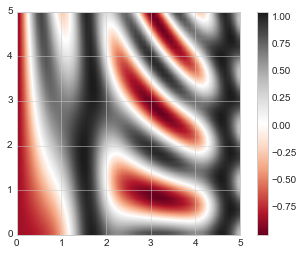

In [91]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

Finally, it can sometimes be useful to combine contour plots and image plots.
For example, here we'll use a partially transparent background image (with transparency set via the ``alpha`` parameter) and overplot contours with labels on the contours themselves (using the ``plt.clabel()`` function):

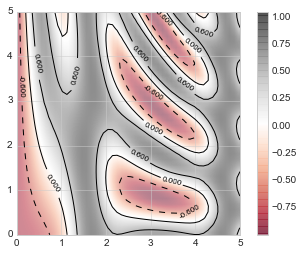

In [92]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

**Exercise: ** Use ``imshow`` to visualize the density of a multivariate normal distribution centered at $\begin{bmatrix} 2 & 0 \\ 5\end{bmatrix}$ with covariance matrix $\begin{bmatrix} 4 & 0.8 \\ 0.8 & 1\end{bmatrix}$. *Hint:* check out ``scipy.stats.multivariate_normal``.

## Histograms

Histograms can give very important baseline insight into data distributions.

In [94]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

In its most basic form:

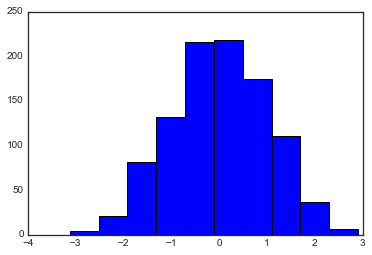

In [95]:
plt.hist(data);

We can customise many properties:

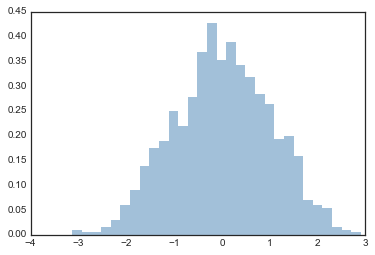

In [97]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

We can also contrast multiple histograms:

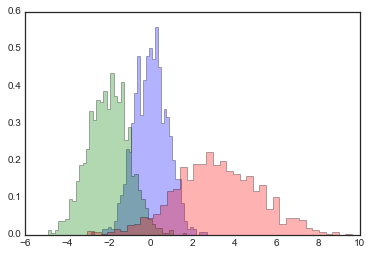

In [99]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);